#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

*Enter your answer in this cell*

1. 

    - Numeric data: summary stats: mean/median/variance, distribution shape, outliers, skewness check
    
    - Categorical data: frequency, cardinality, rare level detection, category imbalance
    
    - Relationship: groupwise analysis, plots across categorise, statistical tests

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [4]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
n = 1000

In [5]:
# Your code here
# categorical data
categories = [f"cat{i}" for i in range(1, 11)]
cat_col = rng.choice(categories, size=n)

# numeric data
num1 = rng.normal(loc=[categories.index(c)/2 for c in cat_col], scale=1.0, size=n)
num2 = 0.5*num1 + rng.normal(loc=categories.index(cat_col[0])/10, scale=1.0, size=n)

df = pd.DataFrame({
    "category": cat_col,
    "num1": num1,
    "num2": num2
})

Numeric summary:


,num1,num2
count,1000.000000,1000.000000
mean,2.243246,1.034352
std,1.793993,1.320191
min,-3.148413,-2.943524
25%,0.900980,0.159483
50%,2.247926,1.066379
75%,3.591557,1.911444
max,6.729274,6.041361


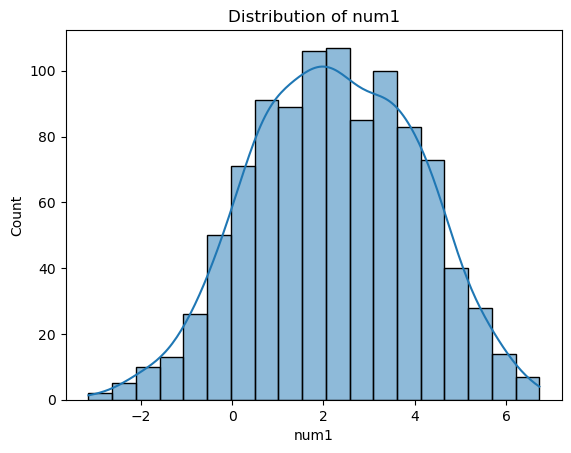

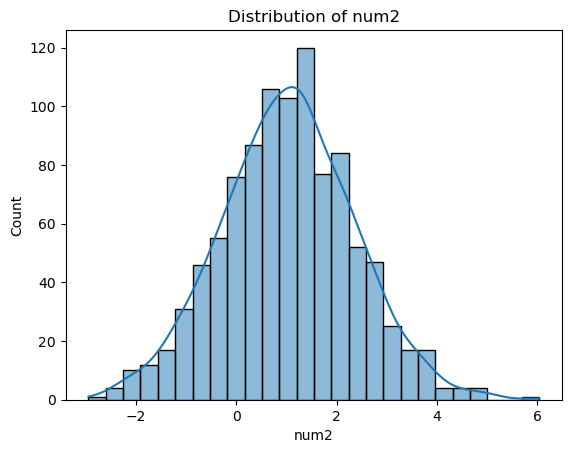

Correlation matrix:
          num1      num2
num1  1.000000  0.645131
num2  0.645131  1.000000


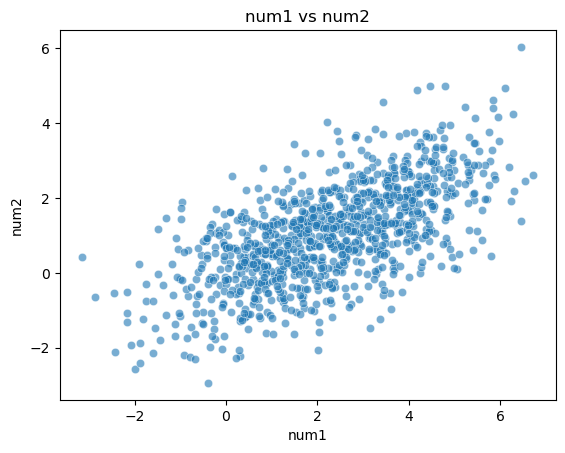

In [6]:
# Your code here
# numeric
print("Numeric summary:")
display(df[["num1", "num2"]].describe())

sns.histplot(df["num1"], kde=True)
plt.title("Distribution of num1")
plt.show()

sns.histplot(df["num2"], kde=True)
plt.title("Distribution of num2")
plt.show()

print("Correlation matrix:")
print(df[["num1","num2"]].corr())

sns.scatterplot(data=df, x="num1", y="num2", alpha=0.6)
plt.title("num1 vs num2")
plt.show()

Category frequencies:


category
cat2     0.116
cat5     0.115
cat8     0.108
cat6     0.105
cat10    0.103
cat7     0.100
cat1     0.097
cat9     0.093
cat3     0.086
cat4     0.077
Name: proportion, dtype: float64

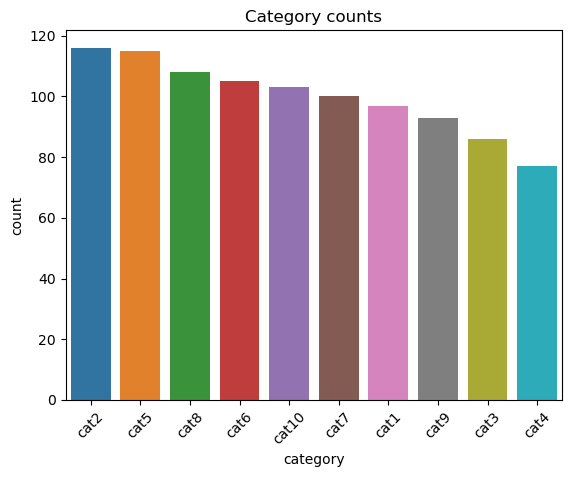

In [7]:
# Your code here
# categorical
print("Category frequencies:")
display(df["category"].value_counts(normalize=True))

sns.countplot(data=df, x="category", order=df["category"].value_counts().index)
plt.title("Category counts")
plt.xticks(rotation=45)
plt.show()

Group-wise statistics:


num1                                num2                      \
              mean    median       std count      mean    median       std   
category                                                                     
cat1      0.114766  0.291231  1.109013    97  0.076224  0.133036  1.179924   
cat10     4.511582  4.553482  0.998731   103  2.247554  2.338051  1.131951   
cat2      0.277264  0.391185  1.118299   116  0.140811  0.240466  1.126881   
cat3      0.784571  0.736620  1.026072    86  0.265197  0.355927  1.151988   
cat4      1.449145  1.563002  0.806158    77  0.593953  0.603629  1.071648   
cat5      1.983390  1.939748  0.881537   115  0.925783  0.875855  1.026364   
cat6      2.637883  2.618348  1.064560   105  1.206510  1.205081  1.102240   
cat7      3.094029  3.238546  1.044545   100  1.245979  1.285756  1.056542   
cat8      3.403321  3.453717  1.022656   108  1.554214  1.670130  1.067509   
cat9      4.023354  4.002993  1.044924    93  1.989064  1.969049  1.187943   

                
         count  
category        
cat1        97  
cat10      103  
cat2       116  
cat3        86  
cat4        77  
cat5       115  
cat6       105  
cat7       100  
cat8       108  
cat9        93

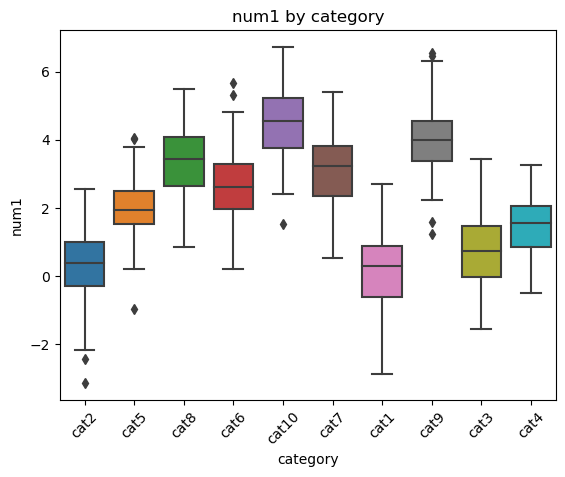

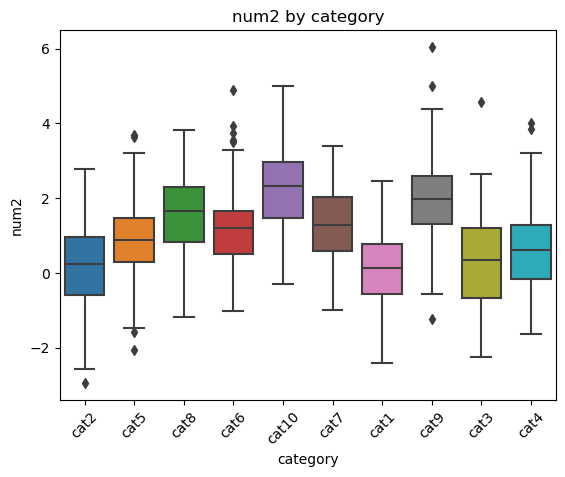

In [8]:
# Your code here
# relationship
grouped = df.groupby("category")[["num1","num2"]].agg(["mean","median","std","count"])
print("Group-wise statistics:")
display(grouped)

sns.boxplot(data=df, x="category", y="num1", order=df["category"].value_counts().index)
plt.title("num1 by category")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x="category", y="num2", order=df["category"].value_counts().index)
plt.title("num2 by category")
plt.xticks(rotation=45)
plt.show()

#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [17]:
# Your code here
rng = np.random.default_rng(69)
n = 1000

# categorical data - 1
cats = np.array(list("ABCDE"))
category = rng.choice(cats, size=n, p=[0.25, 0.25, 0.20, 0.20, 0.10])

# numeric data - 4
num1 = rng.normal(loc=0,     scale=1,     size=n)       # ~N(0, 1)
num2 = rng.normal(loc=50,    scale=10,    size=n)       # ~N(50, 10)
num3 = rng.normal(loc=1000,  scale=200,   size=n)       # ~N(1000, 200)
num4 = rng.normal(loc=1e6,   scale=2e5,   size=n)       # ~N(1,000,000, 200,000)

cat_effects = { "A": 0.00, "B": 0.20, "C": -0.10, "D": 0.35, "E": -0.25 }
cat_shift = np.vectorize(cat_effects.get)(category)

# standardize numerics
def z(x): return (x - np.nanmean(x)) / np.nanstd(x)

signal = (
    1.2 * z(num1)
  - 0.8 * z(num2)
  + 0.6 * z(num3)
  - 0.3 * z(num4)
  + cat_shift
)

# add noise
noise = rng.normal(0, 0.5, size=n)
logit = signal + noise
p = 1 / (1 + np.exp(-logit))

# boolean data - 1
target = rng.binomial(1, p).astype(bool)

# assemble df
df = pd.DataFrame({
    "category": category,
    "num1": num1,
    "num2": num2,
    "num3": num3,
    "num4": num4,
    "target": target
})

In [18]:
# Your code here
null_rate = 0.05
for col in ["category", "num1", "num2", "num3", "num4"]:
    idx = rng.choice(n, size=int(n * null_rate), replace=False)
    df.loc[idx, col] = np.nan

In [19]:
df.head()

,category,num1,num2,num3,num4,target
0,NaN,-0.644565,63.279390,951.522867,889753.867623,False
1,C,1.604820,39.262032,837.635806,644675.976308,True
2,D,0.739074,47.304398,973.035612,611501.569732,True
3,D,-0.432281,44.360531,893.998082,671599.687226,True
4,B,-0.741713,52.976218,1229.265104,967311.454186,False


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [20]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def run_classifier(df,classifier):
    # Separate features/target
    y = df["target"].astype(int)  # logistic expects numeric; 0/1 from boolean
    X = df.drop(columns=["target"])

    # Identify column types
    num_features = X.select_dtypes(include=[np.number]).columns.tolist()
    cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

    # Preprocess: numeric = impute(median) -> scale
    numeric_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    # Preprocess: categorical = impute(mode) -> one-hot
    # (handle_unknown='ignore' avoids errors with unseen categories in CV)
    try:
        # sklearn >= 1.2
        categorical_pipe = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
        ])
    except TypeError:
        # older sklearn
        categorical_pipe = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=False))
        ])

    preproc = ColumnTransformer(transformers=[
        ("num", numeric_pipe, num_features),
        ("cat", categorical_pipe, cat_features),
    ])

    # Full pipeline: preprocessing + passed-in classifier
    pipeline = Pipeline(steps=[
        ("preprocess", preproc),
        ("clf", classifier),
    ])
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)


scores = run_classifier(df,LogisticRegression(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

F1 (5-fold): mean=0.729, std=0.019
Fold scores: [0.699 0.743 0.726 0.721 0.756]


Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [21]:
# Your code here
from sklearn.ensemble import RandomForestClassifier

# Try RandomForestClassifier instead of LogisticRegression
rf = RandomForestClassifier(
    n_estimators=300,    # number of trees
    max_depth=None,      # let trees expand fully
    random_state=42,
    n_jobs=-1            # use all CPU cores
)

scores = run_classifier(df, rf)

print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

F1 (5-fold): mean=0.720, std=0.032
Fold scores: [0.739 0.682 0.691 0.771 0.717]


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

*Enter your answer in this cell*

In my case, Logistic Regression performed slightly better than Random Forest and showed lower variance across folds. This is because of how I generated the data: the target was randomly created, then standardized as a noisy linear combination of the numeric features plus category effects. Logistic Regression directly models linear relationships, so it is a natural fit for the way the target was constructed. Random Forests are more flexible and can capture nonlinear interactions, but in this case that flexibility didn’t provide an advantage and may have led to chasing noise. That explains why Logistic Regression edged out Random Forest here.